In [1]:
import pandas as pd
import numpy as np

from survivors import metrics as metr
from survivors import constants as cnt

import matplotlib.pyplot as plt
import seaborn as sns

custom_params = {"axes.spines.right": False, 'grid.color': 'lightgray', 'axes.grid': True, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

### DIP test

Text(0, 0.5, 'Dip value')

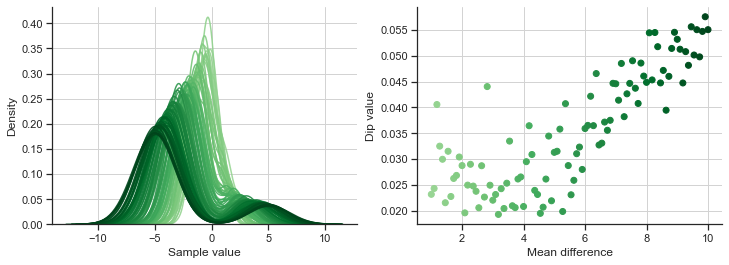

In [2]:
import diptest
from lifelines import KaplanMeierFitter
import matplotlib.cm as cm
from scipy import stats

def get_sf_diff(time):
    cens = np.ones_like(time)
    bins = cnt.get_bins(time=time)
    
    kmf = KaplanMeierFitter()
    kmf.fit(time, cens)
    sf = kmf.survival_function_at_times(bins).to_numpy()
    # plt.step(bins, sf)
    return np.trapz((sf - 0.5)**2, bins)

def get_dip(dist=0):
    a = np.random.normal(loc=-dist*0.5, scale=1.0, size=100)
    b = np.random.normal(loc=dist*0.5, scale=1.0, size=100)

    v = np.hstack([a, b])
    sns.kdeplot(v, label=diptest.dipstat(v))
    #plt.legend()
    return diptest.dipstat(v)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
x = np.linspace(1, 10, 100)
# x = np.linspace(1, 3000, 100)
y1 = []
y2 = []
np.random.seed(0)
for dist in x:
    a = np.random.normal(loc=-dist*0.5, scale=1, size=100)
    b = np.random.normal(loc=+dist*0.5, scale=1, size=20)
#     a = np.random.normal(loc=1200-dist*0.5, scale=328, size=100)
#     b = np.random.normal(loc=1200+dist*0.5, scale=381, size=80)

    v = np.hstack([a, b])
    sns.kdeplot(v, alpha=0.9, color=cm.Greens((dist+5)/(max(x)+5)), ax=axes[0], cbar=True)
    y1.append(diptest.dipstat(v))

axes[0].set_xlabel("Sample value")
axes[1].scatter(x, y1, c=[cm.Greens((dist+5)/(max(x)+5)) for dist in x])
axes[1].set_xlabel("Mean difference")
axes[1].set_ylabel("Dip value")

### Wide experiments with different distributions

PearsonRResult(statistic=-0.9950731515409845, pvalue=3.476917915458501e-100) PearsonRResult(statistic=0.7981080520353604, pvalue=2.7385476868481433e-23)
SignificanceResult(statistic=-0.9999999999999999, pvalue=0.0) SignificanceResult(statistic=0.9963276327632762, pvalue=1.997575032228972e-106)
SignificanceResult(statistic=-1.0, pvalue=2.143020576250934e-158) SignificanceResult(statistic=0.9620202020202021, pvalue=1.1877407893808152e-45)


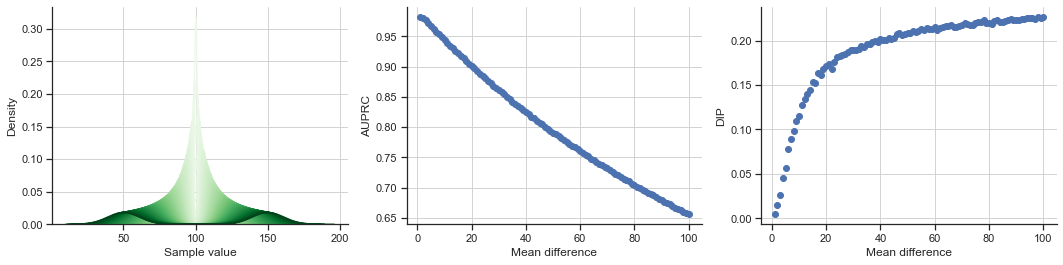

In [5]:
from lifelines import KaplanMeierFitter
import matplotlib.cm as cm
import scipy.stats
import diptest

def get_sf_diff(time, cens, bins):
    y = cnt.get_y(time=v, cens=cens)
    
    kmf = KaplanMeierFitter()
    kmf.fit(time, cens)
    sf = kmf.survival_function_at_times(bins).to_numpy()
#     plt.step(bins, sf)
    return metr.auprc(y, y, np.repeat(sf[np.newaxis, :], time.shape[0], axis=0), bins)

fig, axes = plt.subplots(1, 3, figsize=(18, 4))
x = np.linspace(1, 100, 100)
y1 = []
y2 = []
np.random.seed(0)
bins = cnt.get_bins(time=np.linspace(1, 200, 100))
for dist in x:
    # Similar results
#     a = np.random.weibull(5, size=1000) + 20 - dist*0.1
#     b = np.random.weibull(5, size=1000) + 20 + dist*0.1

    # AUPRC better DIP
#     a = np.random.lognormal(10 + dist*0.05, 2, size=1000)
#     b = np.random.lognormal(10 - dist*0.05, 2, size=1000)

    # AUPRC better DIP
#     a = np.random.normal(loc=100 + dist*0.5, scale=2, size=1000)
#     b = np.random.normal(loc=100 - dist*0.5, scale=2, size=1000)
    
    # AUPRC better DIP
    a = np.random.laplace(loc=100 + dist*0.5, scale=1, size=1000)
    b = np.random.laplace(loc=100 - dist*0.5, scale=1, size=1000)
    v = np.hstack([a, b])
    v_cens = np.ones_like(v)
    # v_cens = np.hstack([np.zeros_like(a), np.ones_like(b)])
#     sns.kdeplot(v, alpha=0.9, ax=axes[0], bw_adjust=0.1)
    sns.kdeplot(v, alpha=0.9, color=cm.Greens((dist+5)/(max(x)+5)), ax=axes[0], cbar=True)
    y1.append(get_sf_diff(v, v_cens, bins))
    y2.append(diptest.dipstat(v))

axes[0].set_xlabel("Sample value")
# axes[1].scatter(x, y1) #, c=[cm.Greens((dist+5)/(max(x)+5)) for dist in x])
axes[1].scatter(x, y1)
axes[1].set_xlabel("Mean difference")
axes[1].set_ylabel("AUPRC")
axes[2].scatter(x, y2)
axes[2].set_xlabel("Mean difference")
axes[2].set_ylabel("DIP")
print(scipy.stats.pearsonr(x, y1), scipy.stats.pearsonr(x, y2))
print(scipy.stats.spearmanr(x, y1), scipy.stats.spearmanr(x, y2))
print(scipy.stats.kendalltau(x, y1), scipy.stats.kendalltau(x, y2))